In [7]:
# Install Vectice
%pip install -q vectice -U

Note: you may need to restart the kernel to use updated packages.


### Instructions

Paste your API token below and execute the block. (your token can be generated [here](https://app.vectice.com/account/api-keys) )   

How to capture a model in Vectice for documentating

In [8]:
# Import vectice package
import vectice as vct

# Connect using your token API - Your token can be found here: https://app.vectice.com/account/api-keys
conn = vct.connect(
    api_token='YOUR API TOKEN', 
    host='https://app.vectice.com',
    workspace='Samples'
)

# Open the project
project = conn.project("How To: Reporting your Milestones")

Workspace 'Samples' successfully retrieved."

For quick access to the workspace in the Vectice web app, visit:
https://app.vectice.com/workspace/dashboard/project-progress?w=2110
Welcome, 'Eric Barre'. You`re now successfully connected to the workspace 'Samples' in Vectice.

To access a specific project, use workspace.project(Project ID)
To get a list of projects you can access and their IDs, use workspace.list_projects()

For quick access to the list of projects in the Vectice web app, visit:
https://app.vectice.com/workspace/projects?w=2110


#### Alternate methods of connecting:  
<ul>project = vct.connect(config='~/.config/vectice-config.json')</ul>  
provided the json file contains the "WORKSPACE" and "PROJECT" entries,  
OR  
<ul>project = vct.connect(config='~/.config/vectice-config.json', workspace="ws_name", project="project_name")</ul>  
Both will return a project object

[API Reference](https://api-docs.vectice.com/reference/vectice/connection/)

### Generate a Random Forest model - This is boiler plate code, we do not change your workflow.

Accuracy: 0.9555555555555556


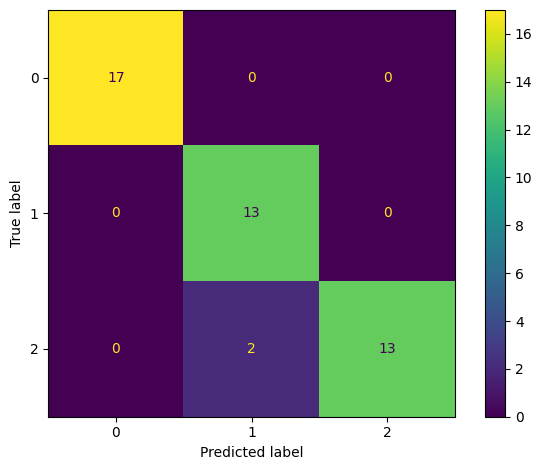

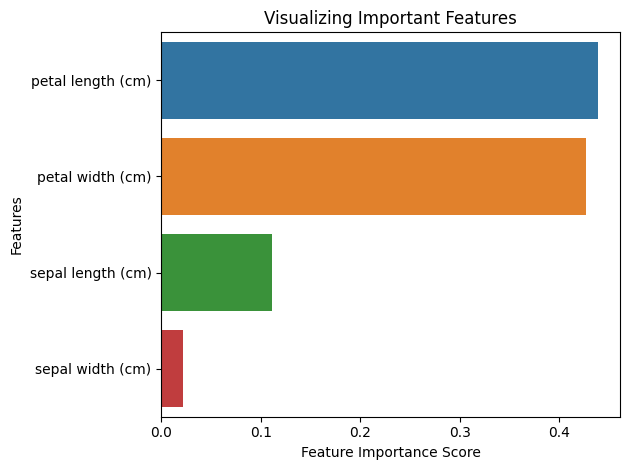

In [9]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load dataset
iris = datasets.load_iris()

# Transform data
data= pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

# Separate features/labels
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
acc_score = {'Accuracy': metrics.accuracy_score(y_test, y_pred)}

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.tight_layout()
plt.savefig('Confusion_Matrix.png')
plt.show()

# Creating a bar plot
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()
plt.savefig('Feature_Importance.png')
plt.show()


### Document the base model in Vectice

In [10]:
# We have our base model...great milestone to log in Vectice!!
# Where were we?
project.list_phases()

There are 3 phases in the project 'How To: Reporting your Milestones' and a maximum of 10 phases are displayed in the table below:

**Legend**     [C]  Completed     [IP] In Progress
               [IR] In Review     [NS] Not Started



 phase id          ┃ name                           ┃ owner          ┃ status         ┃ iterations    ┃ steps           
━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━
 35324             │ Document Dataset               │ Unassigned     │ [NS]           │ 0/0           │ 3               
 35323             │ Logging a model                │ Unassigned     │ [NS]           │ 0/0           │ 1               
 35325             │ Advanced Logging               │ Unassigned     │ [NS]           │ 0/0           │ 1


To access a specific phase, use project.phase(Phase ID)

For quick access to the list of phases for this project, visit:
https://app.vectice.com/project?w=2110&resourceId=8218



In [11]:
# Oh right, "Logging a model". Let's instanciate an iteration of it
phase_iter = project.phase("Logging a model").create_iteration() # Or we can use the phase id
# ...and document our model, Vectice leverages my existing objects to auto-document the model lineage, and publish the relevant metrics to Vectice.
phase_iter.step_assess_model = vct.Model(
                                    name="Iris Classification", 
                                    library="sklearn", 
                                    technique="RandomForestClassifier",
                                    metrics=acc_score,
                                    attachments=["Confusion_Matrix.png","Feature_Importance.png"],
                                    predictor=clf)
#...add a quick comment                                    
phase_iter.step_assess_model = "Base model generated"
#..and done
phase_iter.complete()

Phase 'Logging a model' successfully retrieved."

For quick access to the Phase in the Vectice web app, visit:
https://app.vectice.com/project/phase?w=2110&pageId=35323
New Iteration number '1' created.

For quick access to the Iteration in the Vectice web app, visit:
https://app.vectice.com/project/phase/iteration?w=2110&iterationId=6536
Code captured the following changed files; 23.2/samples/howto_captureModels.ipynb
Model RandomForestClassifier successfully attached to Model(name='Iris Classification', version='Version 1').
New Model: 'Iris Classification' Version: 'Version 1' added to Step: Assess model
Attachments: Feature_Importance.png, Confusion_Matrix.png
Link to Step: https://app.vectice.com/project/phase/iteration?w=2110&iterationId=6536

Added Comment to Step: Assess model

Link to Step: https://app.vectice.com/project/phase/iteration?w=2110&iterationId=6536

Iteration with index 1 completed.

For quick access to the Iteration in the Vectice web app, visit:
https://app.vect

### Model Tuning - Again boiler plate code

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)
clf = RandomForestClassifier(max_depth=random_search.best_estimator_.max_depth,
                            max_features=random_search.best_estimator_.max_features,
                            max_leaf_nodes=random_search.best_estimator_.max_leaf_nodes,
                            n_estimators=random_search.best_estimator_.n_estimators)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc_score = {'Accuracy': metrics.accuracy_score(y_test, y_pred)}


RandomForestClassifier(max_depth=3, max_leaf_nodes=3, n_estimators=50)


### Vectice documentation pipeline

In [13]:

#...Let's capture the hyper parameter tuning and our scores - on a different phase in this sample
phase_iter = project.phase("Advanced Logging").create_iteration()
phase_iter.step_assess_model = vct.Model(
                                    name="Iris Classification", 
                                    library="sklearn", 
                                    technique="RandomForestClassifier",
                                    attachments=['Confusion_Matrix.png','Feature_Importance.png'],
                                    properties = clf.get_params(),
                                    predictor = clf,
                                    metrics = acc_score)
# Add our findings as a comment                                   
phase_iter.step_assess_model = f"Tuned model classification report:\n{classification_report(y_test, y_pred)}"

# Done documenting
phase_iter.complete()

Phase 'Advanced Logging' successfully retrieved."

For quick access to the Phase in the Vectice web app, visit:
https://app.vectice.com/project/phase?w=2110&pageId=35325
New Iteration number '1' created.

For quick access to the Iteration in the Vectice web app, visit:
https://app.vectice.com/project/phase/iteration?w=2110&iterationId=6537
Model RandomForestClassifier successfully attached to Model(name='Iris Classification', version='Version 2').
New Version: 'Version 2' of Model: 'Iris Classification' added to Step: Assess model
Attachments: Feature_Importance.png, Confusion_Matrix.png
Link to Step: https://app.vectice.com/project/phase/iteration?w=2110&iterationId=6537

Added Comment to Step: Assess model

Link to Step: https://app.vectice.com/project/phase/iteration?w=2110&iterationId=6537

Iteration with index 1 completed.

For quick access to the Iteration in the Vectice web app, visit:
https://app.vectice.com/project/phase/iteration?w=2110&iterationId=6537
